In [1]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
from keras_tqdm import TQDMNotebookCallback
import random

In [2]:
import numpy as np
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)


In [4]:
Trump_image_id = os.listdir('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/trump')[0]
Trump_image = load_image(os.path.join('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/trump',Trump_image_id))
model.predict(Trump_image).shape

(1, 1024)

In [5]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: Trump or Boris
x = Dense(2)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [6]:
for layer in model.layers[:-3]:
    layer.trainable = False


In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)


In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image', 
    target_size=(224, 224),
    save_to_dir='/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image',
    target_size=(224, 224),
    save_to_dir='/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/validation_aug',
    subset='validation'
)

Found 176 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [9]:
batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5/5 [==============================] - 5s 988ms/step - loss: 0.8034
Epoch 2/10
5/5 [==============================] - 5s 976ms/step - loss: 0.8537
Epoch 3/10
5/5 [==============================] - 5s 927ms/step - loss: 0.7860
Epoch 4/10
5/5 [==============================] - 4s 873ms/step - loss: 0.6017
Epoch 5/10
5/5 [==============================] - 5s 1s/step - loss: 0.7565
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.7106
Epoch 7/10
5/5 [==============================] - 5s 1s/step - loss: 0.5728
Epoch 8/10
5/5 [==============================] - 4s 864ms/step - loss: 0.4753
Epoch 9/10
5/5 [==============================] - 4s 890ms/step - loss: 0.4385
Epoch 10/10
5/5 [==============================] - 4s 866ms/step - loss: 0.4409


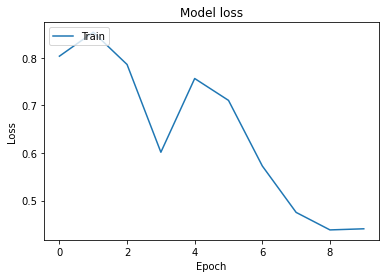

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
random_Boris = random.choice(os.listdir('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/boris'))
Boris_path = os.path.join('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/boris',random_Boris)
Boris = load_image(Boris_path)
random_Trump = random.choice(os.listdir('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/trump'))
Trump_path = os.path.join('/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/image/trump',random_Trump)
Trump = load_image(Trump_path)

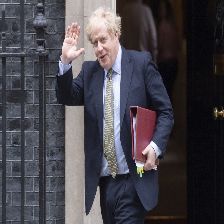

In [12]:
tf.keras.preprocessing.image.load_img(Boris_path, target_size=(224,224))

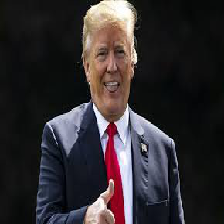

In [13]:
tf.keras.preprocessing.image.load_img(Trump_path, target_size=(224,224))

In [14]:
print(f'''Boris:{np.round(model.predict(Boris),2)}''')

Boris:[[0.47 0.53]]


In [15]:
print(f'''Trump:{np.round(model.predict(Trump),2)}''')

Trump:[[0.25 0.75]]


In [16]:
Barron_path = '/Users/guoyunyun/Desktop/YunyunGuo_RC11_Python/Wanting-Ding---Yunyun-Guo/TrumpBoris/Barron.jpg'
Barron = load_image(Barron_path)

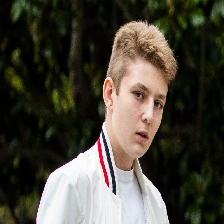

In [17]:
tf.keras.preprocessing.image.load_img(Barron_path, target_size=(224,224))

In [19]:
print(f'''Barron:{np.round(model.predict(Barron),2)}''')

Barron:[[0.41 0.59]]
